In [107]:
import pandas 
import numpy as np
import matplotlib.pyplot as plt

In [108]:
df =pandas.read_csv("data_456.csv")

In [109]:
df

,Unnamed: 0,ozellik-1,ozellik-2,ozellik-3,ozellik-4,ozellik-5,cikis
0,0,-8.129682,-6.193360,5.296303,8.955262,-3.266606,1
1,1,9.705815,-5.275625,6.012196,-5.893469,-6.676234,0
2,2,-7.944387,-6.130736,4.100220,9.626914,-4.119302,1
3,3,9.604341,-5.886795,7.894498,-6.535568,-6.916881,0
4,4,10.157236,-5.550074,7.488372,-5.385435,-6.902762,0
...,...,...,...,...,...,...,...
121,121,-7.976215,-5.958583,6.895382,7.063863,-4.327056,1
122,122,-9.561097,-4.908042,7.178753,9.886277,-4.856857,1
123,123,9.719168,-6.163861,6.408285,-6.020554,-8.105607,0
124,124,11.386864,-6.539713,6.391347,-7.599467,-7.733750,0


In [110]:
cikis = df.iloc[0:60,6].values #çıkış değerlerini aldım
print(cikis.shape)
cikis

(60,)


array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0], dtype=int64)

In [127]:
#çıkış değerleri  0 ve 1
cikis = np.where(df.cikis[:60]==0,-1,1) #0 olan çıkış değerlerimi -1 olarak aldım aralığı değiştirdim 1 ler aynı kalacak
giris = df.iloc[0:60, [1, 2]].values#2 ve 3. stunun  ilk 60 değerini aldım
cikis

array([ 1, -1,  1, -1, -1, -1, -1,  1, -1,  1, -1, -1,  1, -1, -1, -1,  1,
       -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
       -1,  1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,
       -1, -1, -1,  1,  1,  1, -1,  1, -1])

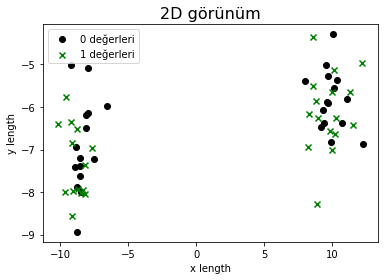

In [128]:
plt.title('2D görünüm', fontsize=16)

plt.scatter(giris[:30, 0], giris[:30, 1], color='black', marker='o', label='0 değerleri')
plt.scatter(giris[30:60, 0], giris[30:60, -1], color='green', marker='x', label='1 değerleri')
plt.xlabel('x length')
plt.ylabel('y length')
plt.legend(loc='upper left')

plt.show()

In [129]:
class Perceptron(object): 
    def __init__(self, ogrenme_orani=0.1, iter_sayisi=10):
        self.ogrenme_orani = ogrenme_orani
        self.iter_sayisi = iter_sayisi

    def ogren(self, X, y):
        self.w = np.zeros(1 + X.shape[1])
        #self.w = np.random.rand((1 + X.shape[1])) * 2
        self.hatalar = []
        for _ in range(self.iter_sayisi):
            hata = 0
            for xi, hedef in zip(X, y):
                degisim = self.ogrenme_orani * (hedef - self.tahmin(xi))
                self.w[1:] += degisim * xi
                self.w[0] += degisim
                hata += int(degisim != 0.0)
            self.hatalar.append(hata)
        return self

    def net_input(self, X):
        return np.dot(X, self.w[1:]) + self.w[0]

    def tahmin(self, x):
        return np.where(self.net_input(x) >= 0.0, 1, -1)

In [130]:
siniflandirici = Perceptron(ogrenme_orani=0.1, iter_sayisi=10)

In [131]:
siniflandirici.ogren(giris, cikis)

In [132]:
siniflandirici.w

array([-0.2      , -1.9411631,  1.055125 ])

In [133]:
siniflandirici.hatalar # ilk 1 ve diğer değerden sonra 0 hata bulup öğreniyor

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

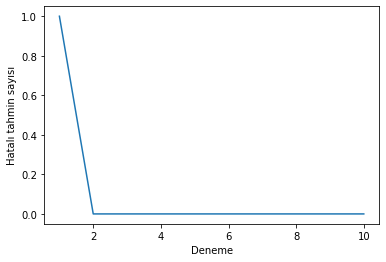

In [134]:
plt.plot(range(1, len(siniflandirici.hatalar) + 1), siniflandirici.hatalar)
plt.xlabel('Deneme')
plt.ylabel('Hatalı tahmin sayısı')
plt.show()

In [142]:
cikis = df.iloc[0:60,6].values #çıkış değerlerini aldım
print(cikis.shape)
cikis

(60,)


array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0], dtype=int64)

In [143]:
#çıkış değerleri  0 ve 1
cikis = np.where(df.cikis[:60]==0,-1,1) #0 olan çıkış değerlerimi -1 olarak aldım aralığı değiştirdim 1 ler aynı kalacak
giris = df.iloc[0:60, [3, 5]].values#4 ve 5. stunun  ilk 60 değerini aldım
cikis

array([ 1, -1,  1, -1, -1, -1, -1,  1, -1,  1, -1, -1,  1, -1, -1, -1,  1,
       -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
       -1,  1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,
       -1, -1, -1,  1,  1,  1, -1,  1, -1])

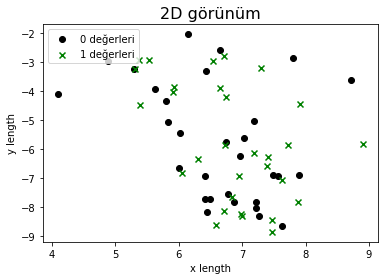

In [144]:
plt.title('2D görünüm', fontsize=16)

plt.scatter(giris[:30, 0], giris[:30, 1], color='black', marker='o', label='0 değerleri')
plt.scatter(giris[30:60, 0], giris[30:60, -1], color='green', marker='x', label='1 değerleri')
plt.xlabel('x length')
plt.ylabel('y length')
plt.legend(loc='upper left')

plt.show()

In [145]:
class Perceptron(object): 
    def __init__(self, ogrenme_orani=0.1, iter_sayisi=10):
        self.ogrenme_orani = ogrenme_orani
        self.iter_sayisi = iter_sayisi

    def ogren(self, X, y):
        self.w = np.zeros(1 + X.shape[1])
        #self.w = np.random.rand((1 + X.shape[1])) * 2
        self.hatalar = []
        for _ in range(self.iter_sayisi):
            hata = 0
            for xi, hedef in zip(X, y):
                degisim = self.ogrenme_orani * (hedef - self.tahmin(xi))
                self.w[1:] += degisim * xi
                self.w[0] += degisim
                hata += int(degisim != 0.0)
            self.hatalar.append(hata)
        return self

    def net_input(self, X):
        return np.dot(X, self.w[1:]) + self.w[0]

    def tahmin(self, x):
        return np.where(self.net_input(x) >= 0.0, 1, -1)

In [220]:
siniflandirici = Perceptron(ogrenme_orani=0.1, iter_sayisi=60)

In [221]:
siniflandirici.ogren(giris, cikis)

In [222]:
siniflandirici.w

array([ 0.4       , -7.57048948,  8.56100231])

In [223]:
siniflandirici.hatalar
#17. öğrenmeden sonra 0 atalı öğrenmeyi buluyor

[15,
 6,
 7,
 2,
 4,
 4,
 4,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

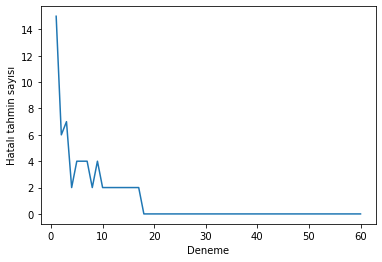

In [224]:
plt.plot(range(1, len(siniflandirici.hatalar) + 1), siniflandirici.hatalar)
plt.xlabel('Deneme')
plt.ylabel('Hatalı tahmin sayısı')
plt.show()

In [206]:
cikis = df.iloc[0:60,6].values #çıkış değerlerini aldım
print(cikis.shape)
cikis


(60,)


array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0], dtype=int64)

In [207]:
#çıkış değerleri  0 ve 1
cikis = np.where(df.cikis[:60]==0,-1,1) #0 olan çıkış değerlerimi -1 olarak aldım aralığı değiştirdim 1 ler aynı kalacak
giris = df.iloc[0:60, [2, 5]].values#3 ve 6. stunun  ilk 60 değerini aldım
cikis

array([ 1, -1,  1, -1, -1, -1, -1,  1, -1,  1, -1, -1,  1, -1, -1, -1,  1,
       -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
       -1,  1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,
       -1, -1, -1,  1,  1,  1, -1,  1, -1])

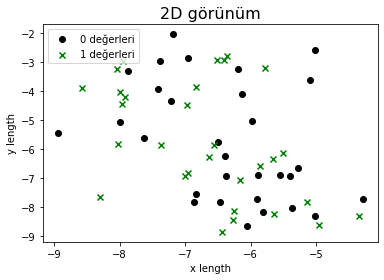

In [208]:
plt.title('2D görünüm', fontsize=16)

plt.scatter(giris[:30, 0], giris[:30, 1], color='black', marker='o', label='0 değerleri')
plt.scatter(giris[30:60, 0], giris[30:60, -1], color='green', marker='x', label='1 değerleri')
plt.xlabel('x length')
plt.ylabel('y length')
plt.legend(loc='upper left')

plt.show()

In [209]:
class Perceptron(object): 
    def __init__(self, ogrenme_orani=0.1, iter_sayisi=10):
        self.ogrenme_orani = ogrenme_orani
        self.iter_sayisi = iter_sayisi

    def ogren(self, X, y):
        self.w = np.zeros(1 + X.shape[1])
        #self.w = np.random.rand((1 + X.shape[1])) * 2
        self.hatalar = []
        for _ in range(self.iter_sayisi):
            hata = 0
            for xi, hedef in zip(X, y):
                degisim = self.ogrenme_orani * (hedef - self.tahmin(xi))
                self.w[1:] += degisim * xi
                self.w[0] += degisim
                hata += int(degisim != 0.0)
            self.hatalar.append(hata)
        return self

    def net_input(self, X):
        return np.dot(X, self.w[1:]) + self.w[0]

    def tahmin(self, x):
        return np.where(self.net_input(x) >= 0.0, 1, -1)

In [215]:
siniflandirici = Perceptron(ogrenme_orani=0.1, iter_sayisi=60)

In [216]:
siniflandirici.ogren(giris, cikis)

In [217]:
siniflandirici.w

array([ 0.4       , -7.57048948,  8.56100231])

In [218]:
siniflandirici.hatalar
#en az hata 9 olarak bulunuyor ve öyle stabil devam ediyor öğreneemiyor

[15,
 6,
 7,
 2,
 4,
 4,
 4,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

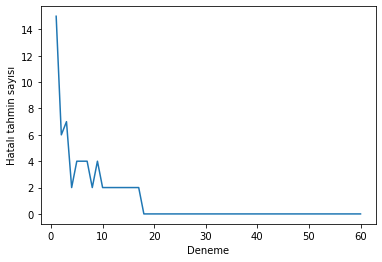

In [219]:
plt.plot(range(1, len(siniflandirici.hatalar) + 1), siniflandirici.hatalar)
plt.xlabel('Deneme')
plt.ylabel('Hatalı tahmin sayısı')
plt.show()
#en az hata 2 ye kadar düşüyor iter sayısını artırdığımda daha sonra öğrendiğini farkettim
